In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
import zipfile
%matplotlib inline

plt.rcParams.update(rcParamsDefault)
large = 22; med = 14; small = 10
params = {'legend.fontsize': med,
      'figure.figsize': (8, 6),
      'axes.labelsize': med,
      'axes.titlesize': med,
      'xtick.labelsize': med,
      'ytick.labelsize': med,
      'figure.titlesize': large,
      'image.origin': 'lower',
      'xtick.major.size': 4,
      'ytick.major.size': 4,
      'xtick.major.width': 0.5,
      'ytick.major.width': 0.5,
      'xtick.minor.size': 4,
      'xtick.minor.width': 0.5,
      'ytick.minor.size': 4,
      'ytick.minor.width': 0.5,
      'axes.linewidth': 0.75,
      'xtick.direction' : 'in', 
      'ytick.direction' : 'out', 
      'font.family': 'sans-serif', 
      'font.sans-serif' : 'Open Sans',
      'font.weight': 'light', # ultralight, light, regular, medium, bold 
      'font.style': 'normal', # normal, italic
         }
plt.rcParams.update(params)
plt.rcParams["figure.dpi"] = 300

In [2]:
zipobj = zipfile.ZipFile('../src/silicon/silicon.k.pdos_tot.zip', 'r')
zipdata = zipobj.open('silicon.k.pdos_tot')
data = np.loadtxt(zipdata)

k = np.unique(data[:,0])  # k values 
e = np.unique(data[:, 1])  # dos energy values 

dos = np.zeros([len(k), len(e)]) 

for i in range(len(data)):
    e_index = int(i % len(e))
    k_index = int(data[i][0] - 1) 
    dos[k_index, e_index] = data[i][2]

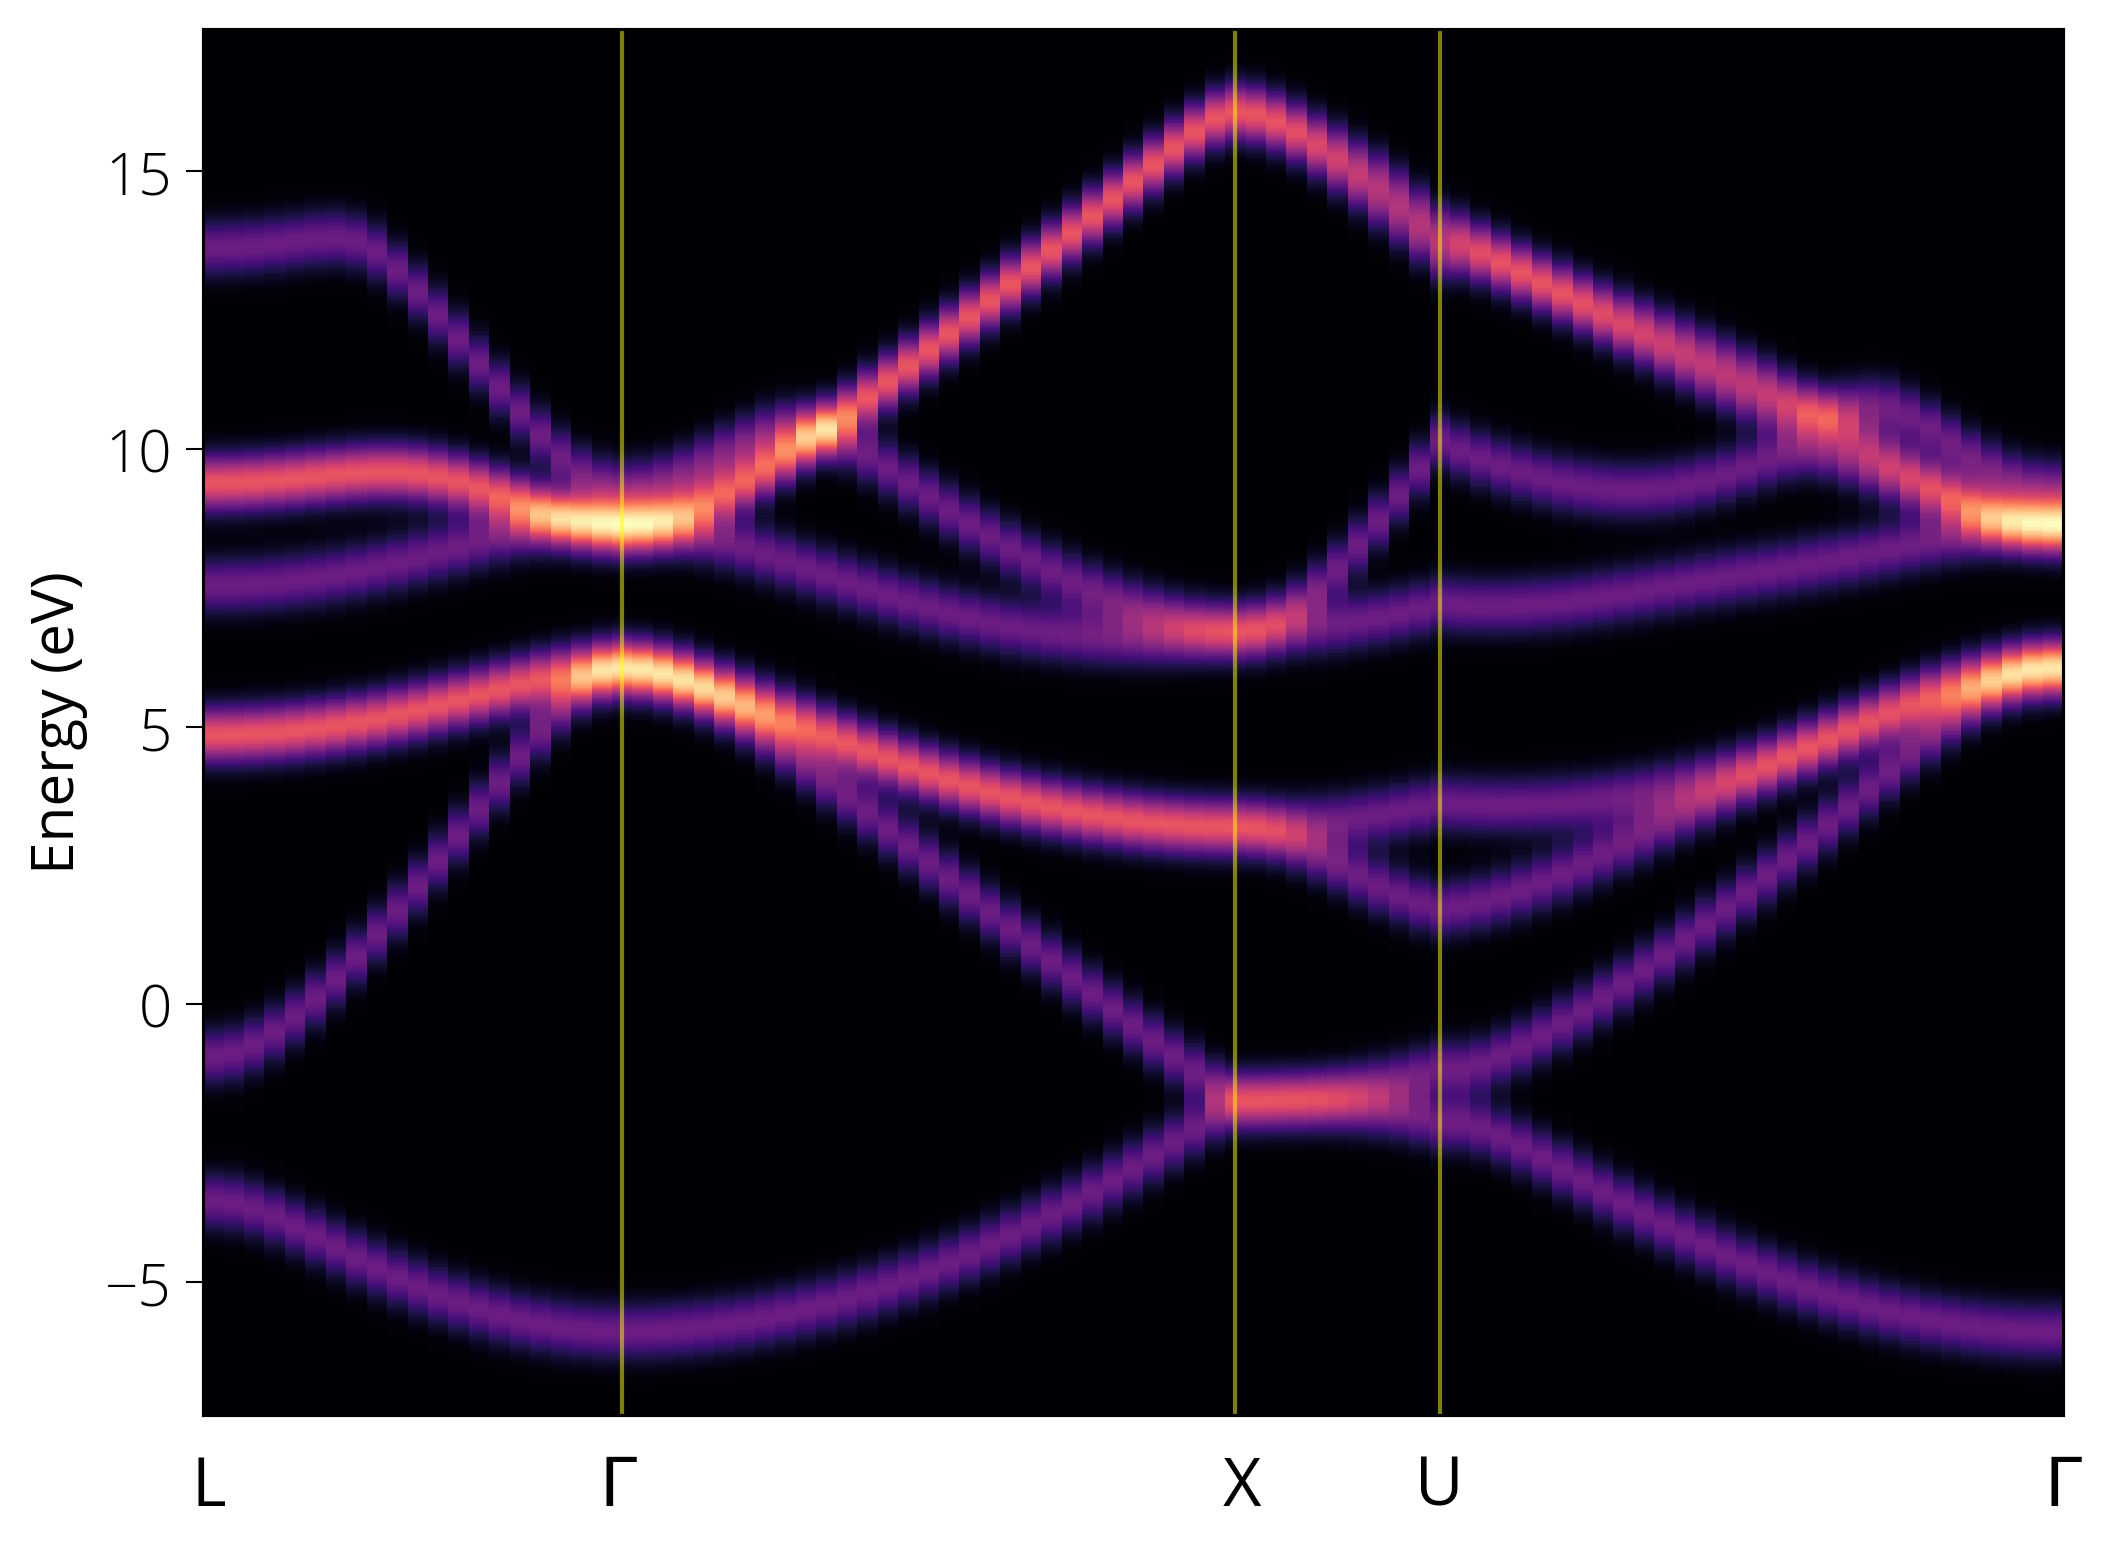

In [3]:
plt.pcolormesh(k, e, dos.T, cmap='magma', shading='auto')
# plt.ylim(-2, 10)
plt.xticks([]);
plt.ylabel('Energy (eV)')
plt.xticks([])
plt.gcf().text(0.12, 0.06, 'L', fontsize=16, fontweight='normal')
plt.gcf().text(0.29, 0.06, '$\Gamma$', fontsize=16, fontweight='normal')
plt.gcf().text(0.55, 0.06, 'X', fontsize=16, fontweight='normal')
plt.gcf().text(0.63, 0.06, 'U', fontsize=16, fontweight='normal')
plt.gcf().text(0.892, 0.06, '$\Gamma$', fontsize=16, fontweight='normal')
plt.axvline(21, c='yellow', lw=1, alpha=0.5)
plt.axvline(51, c='yellow', lw=1, alpha=0.5)
plt.axvline(61, c='yellow', lw=1, alpha=0.5)
plt.show()